# 高速违章数据分析

In [1]:
import pandas as pd
from IPython.display import display

读取数据

In [2]:
data_path = "/Users/jiarui/Study/交通事故/data/data.csv"
df = pd.read_csv(data_path)

In [3]:
# 驾驶证号是判断司机的唯一标识码，可以看有多少人多次违章
driver_count = df['驾驶证号'].value_counts()
# display(driver_count)
## 有多少大于等于3次违法的
count = (driver_count >= 3).sum()
count2 = (driver_count == 2).sum()
print("总共违法记录{}，总共有{}个违法人\n其中违法次数大于等于3的有{}人\n违法次数2的有{}人".format(len(df), len(driver_count), count, count2))

总共违法记录17103，总共有15051个违法人
其中违法次数大于等于3的有258人
违法次数2的有1459人


In [4]:
##取前几条数据看看都是犯了什么事情
for i in driver_count.index[1:5]:
    dfi = df[df['驾驶证号'] == i]
    display(dfi.drop(columns=["违法编号", "驾驶证号", '档案编号', '唯一标识', '强制措施凭证编号', '更新时间', '执勤民警警号']))

,违法类型,违法时间,号牌种类,号牌号码,所有人,使用性质,车辆类型,发证机关,准驾车型,当事人姓名,...,处理机关大队简称,处理时间,缴款标记,缴款日期,事故等级,执勤民警姓名,录入时间,违法行为大类,违法行为小类,违法行为描述
9979,现场,2021-05-14 09:25:00,1,津CC3057,天津运力信息科技有限公司,F,Q11,湘D,A2,唐晓民,...,金华支队一大队,2021-05-14 09:25:00,1,2021-05-15,0,黄旭伟,2021-05-14 09:31:17,机动车违法,违法装载,机动车载货长度、宽度、高度超过规定的
10836,现场,2021-05-24 09:26:00,1,津CC3057,天津运力信息科技有限公司,F,Q11,湘D,A2,唐晓民,...,金华支队一大队,2021-05-24 09:26:00,1,2021-05-25,0,傅康宁,2021-05-24 09:27:57,机动车违法,违法装载,机动车载货长度、宽度、高度超过规定的
11263,现场,2021-05-28 09:30:00,1,津CC3057,天津运力信息科技有限公司,F,Q11,湘D,A2,唐晓民,...,金华支队一大队,2021-05-28 09:30:00,1,2021-05-30,0,傅康宁,2021-05-28 09:31:09,机动车违法,擅自销售生产机动车,擅自改变机动车外形和已登记的有关技术数据的
12149,现场,2021-06-07 08:57:00,1,津CC3057,天津运力信息科技有限公司,F,Q11,湘D,A2,唐晓民,...,金华支队一大队,2021-06-07 08:57:00,1,2021-06-08,0,傅康宁,2021-06-07 09:01:43,机动车违法,擅自销售生产机动车,擅自改变机动车外形和已登记的有关技术数据的
12150,现场,2021-06-07 08:57:00,1,津CC3057,天津运力信息科技有限公司,F,Q11,湘D,A2,唐晓民,...,金华支队一大队,2021-06-07 08:57:00,1,2021-06-08,0,傅康宁,2021-06-07 11:11:48,机动车违法,其他影响安全行为,"在高速公路或城市快速路以外的道路上行驶时,驾驶人未按规定使用安全带的"
12479,现场,2021-06-09 09:14:00,1,津CC3057,天津运力信息科技有限公司,F,Q11,湘D,A2,唐晓民,...,金华支队一大队,2021-06-09 09:14:00,1,2021-06-11,0,黄旭伟,2021-06-09 09:17:37,机动车违法,违法装载,机动车载货长度、宽度、高度超过规定的


,违法类型,违法时间,号牌种类,号牌号码,所有人,使用性质,车辆类型,发证机关,准驾车型,当事人姓名,...,处理机关大队简称,处理时间,缴款标记,缴款日期,事故等级,执勤民警姓名,录入时间,违法行为大类,违法行为小类,违法行为描述
2887,现场,2021-04-09 10:07:00,1,赣C6149Z,江西瑞鹿物流有限公司,F,Q11,黑P,A2,李勇,...,金华支队一大队,2021-04-09 10:07:00,1,2021-04-10,0,严明明,2021-04-09 10:09:19,机动车违法,擅自销售生产机动车,擅自改变机动车外形和已登记的有关技术数据的
3113,现场,2021-04-18 09:22:00,1,赣C6149Z,江西瑞鹿物流有限公司,F,Q11,黑P,A2,李勇,...,金华支队一大队,2021-04-18 09:22:00,1,2021-04-18,0,黄旭伟,2021-04-18 09:26:32,机动车违法,违法上道路行驶,驾驶机件不符合技术标准的机动车的
3887,现场,2021-05-15 10:15:00,1,赣C6149Z,江西瑞鹿物流有限公司,F,Q11,黑P,A2,李勇,...,金华支队一大队,2021-05-15 10:15:00,1,2021-05-15,0,傅康宁,2021-05-15 10:16:25,机动车违法,擅自销售生产机动车,擅自改变机动车外形和已登记的有关技术数据的
4462,现场,2021-05-24 09:56:00,1,赣C6149Z,江西瑞鹿物流有限公司,F,Q11,黑P,A2,李勇,...,金华支队一大队,2021-05-24 09:56:00,1,2021-05-24,0,傅康宁,2021-05-24 09:57:37,机动车违法,擅自销售生产机动车,擅自改变机动车外形和已登记的有关技术数据的
15296,现场,2021-06-15 10:34:00,1,皖SC8856,安徽瑞鹿物流有限公司,F,Q11,黑P,A2,李勇,...,金华支队一大队,2021-06-15 10:34:00,1,2021-06-15,0,郑金甸,2021-06-15 10:37:51,机动车违法,违法装载,机动车载货长度、宽度、高度超过规定的
15444,现场,2021-06-21 10:15:00,1,皖SC8856,安徽瑞鹿物流有限公司,F,Q11,黑P,A2,李勇,...,金华支队一大队,2021-06-21 10:15:00,1,2021-06-22,0,黄旭伟,2021-06-21 10:24:04,机动车违法,违法上道路行驶,驾驶机件不符合技术标准的机动车的


,违法类型,违法时间,号牌种类,号牌号码,所有人,使用性质,车辆类型,发证机关,准驾车型,当事人姓名,...,处理机关大队简称,处理时间,缴款标记,缴款日期,事故等级,执勤民警姓名,录入时间,违法行为大类,违法行为小类,违法行为描述
7352,现场,2021-03-25 10:35:00,1,豫NT6443,睢县宏顺运输有限责任公司,F,Q11,豫N,A1A2,齐富永,...,金华支队三大队,2021-03-25 10:35:00,1,2021-03-25,0,葛峰,2021-03-25 10:37:48,机动车违法,违法上道路行驶,机动车号牌不清晰、不完整的
7679,现场,2021-03-28 10:18:00,1,豫NT6443,睢县宏顺运输有限责任公司,F,Q11,豫N,A1A2,齐富永,...,金华支队三大队,2021-03-28 10:18:00,1,2021-03-28,0,金秀杰,2021-03-28 10:20:11,机动车违法,违法上道路行驶,机动车号牌不清晰、不完整的
10359,现场,2021-04-28 09:34:00,1,豫NT6443,睢县宏顺运输有限责任公司,F,Q11,豫N,A1A2,齐富永,...,金华支队三大队,2021-04-28 09:34:00,1,2021-04-28,0,金秀杰,2021-04-28 09:36:12,机动车违法,违法上道路行驶,机动车号牌不清晰、不完整的
10636,现场,2021-04-28 09:34:00,1,豫NT6443,睢县宏顺运输有限责任公司,F,Q11,豫N,A1A2,齐富永,...,金华支队三大队,2021-04-28 09:34:00,1,2021-04-29,0,金秀杰,2021-04-28 09:37:21,其他违法,其他违法行为,未按规定喷涂放大号
10925,现场,2021-05-15 10:38:00,1,豫NT6443,睢县宏顺运输有限责任公司,F,Q11,豫N,A1A2,齐富永,...,金华支队三大队,2021-05-15 10:38:00,1,2021-05-15,0,唐雪飞,2021-05-15 10:42:28,机动车违法,违法装载,机动车载物行驶时遗洒、飘散载运物的
10926,现场,2021-05-15 10:38:00,1,豫NT6443,睢县宏顺运输有限责任公司,F,Q11,豫N,A1A2,齐富永,...,金华支队三大队,2021-05-15 10:38:00,1,2021-05-15,0,唐雪飞,2021-05-15 10:43:52,机动车违法,违法上道路行驶,机动车号牌不清晰、不完整的


,违法类型,违法时间,号牌种类,号牌号码,所有人,使用性质,车辆类型,发证机关,准驾车型,当事人姓名,...,处理机关大队简称,处理时间,缴款标记,缴款日期,事故等级,执勤民警姓名,录入时间,违法行为大类,违法行为小类,违法行为描述
6628,现场,2021-03-16 10:36:00,1,浙A65F52,桐庐安胜运输有限公司,F,Q11,贵G,A2,田景华,...,金华支队一大队,2021-03-16 10:36:00,1,2021-03-16,0,傅康宁,2021-03-16 10:40:08,机动车违法,其他影响安全行为,"在高速公路或城市快速路以外的道路上行驶时,驾驶人未按规定使用安全带的"
6629,现场,2021-03-16 10:36:00,1,浙A65F52,桐庐安胜运输有限公司,F,Q11,贵G,A2,田景华,...,金华支队一大队,2021-03-16 10:36:00,1,2021-03-16,0,傅康宁,2021-03-16 10:39:14,机动车违法,违法装载,机动车载货长度、宽度、高度超过规定的
9696,现场,2021-04-18 10:44:00,1,浙A65F52,桐庐安胜运输有限公司,F,Q11,贵G,A2,田景华,...,金华支队一大队,2021-04-18 10:44:00,1,2021-04-18,0,郑金甸,2021-04-18 10:46:47,机动车违法,违法装载,机动车载货长度、宽度、高度超过规定的
12344,现场,2021-05-24 08:57:00,1,浙A65F52,桐庐安胜运输有限公司,F,Q11,贵G,A2,田景华,...,金华支队一大队,2021-05-24 08:57:00,1,2021-06-01,0,傅旭阳,2021-05-24 09:05:37,机动车违法,违法上道路行驶,驾驶机件不符合技术标准的机动车的
13871,现场,2021-06-17 09:10:00,1,浙A65F52,桐庐安胜运输有限公司,F,Q11,贵G,A2,田景华,...,金华支队一大队,2021-06-17 09:10:00,1,2021-06-17,0,傅康宁,2021-06-17 09:13:53,机动车违法,未按规定办理业务,载货汽车、挂车未按照规定安装侧面及后下部防护装置、粘贴车身反光标识的
13872,现场,2021-06-17 09:10:00,1,浙A65F52,桐庐安胜运输有限公司,F,Q11,贵G,A2,田景华,...,金华支队一大队,2021-06-17 09:10:00,1,2021-06-17,0,傅康宁,2021-06-17 09:12:53,机动车违法,违法装载,机动车载货长度、宽度、高度超过规定的


In [5]:
##统计违法行为大类的种类和次数
pd.set_option('display.max_rows', 100)
action_count = df['违法行为大类'].value_counts()
print(action_count.head(70))
print(len(action_count))

机动车违法    15525
其他违法      1578
Name: 违法行为大类, dtype: int64
2


In [6]:
##统计违法行为小类的种类和次数
pd.set_option('display.max_rows', 100)
action_count = df['违法行为小类'].value_counts()
print(action_count.head(70))
print(len(action_count))

违法上道路行驶         5838
其他影响安全行为        5648
违法装载            2206
其他违法行为          1578
超速行驶             711
未按规定办理业务         277
擅自销售生产机动车        254
疲劳驾驶             179
违法停车             102
不按规定使用灯光          89
违反交通信号            75
违法变更车道            57
违法倒车              53
无证驾驶              27
未携带驾驶证             3
货动车辆超载             3
违法超车               1
违法占道行驶             1
违法装载超限及危险品运输       1
Name: 违法行为小类, dtype: int64
19


In [7]:
##统计违法行为描述的种类和次数
pd.set_option('display.max_rows', 100)
action_count = df['违法行为描述'].value_counts()
print(action_count.head(70))
print(len(action_count))

驾驶机件不符合技术标准的机动车的                                          5483
在高速公路或城市快速路以外的道路上行驶时,驾驶人未按规定使用安全带的                        2827
放置妨碍驾驶人视线的物品的                                             1998
机动车载货长度、宽度、高度超过规定的                                        1843
未按规定喷涂放大号                                                 1578
驾驶机动车在高速公路上行驶低于规定时速20%以下的                                  691
赤脚、穿拖鞋或者穿高跟鞋驾驶机动车的                                         272
载货汽车、挂车未按照规定安装侧面及后下部防护装置、粘贴车身反光标识的                         270
机动车号牌不清晰、不完整的                                              254
擅自改变机动车外形和已登记的有关技术数据的                                      254
连续驾驶中型以上载客汽车、危险物品运输车辆以外的机动车超过4小时未停车休息或者停车休息时间少于20分钟的       175
高速公路上车辆发生故障后不按规定设置警告标志的                                    174
机动车载物行驶时遗洒、飘散载运物的                                          169
机动车未按规定在车厢后部或者车身喷涂车号                                       114
货运机动车驾驶室载人超过核定人数的                                          107
在同车道行驶中，不按规定与前车保持必要的安全距离的                              

In [8]:
# 统计违法记分数的种类和次数，并看扣去12分和6分的都是什么违章
pd.set_option('display.max_rows', 100)
action_count = df['违法记分数'].value_counts()
print(action_count.head(10))
print(len(action_count))
dfi = df[df['违法记分数'] == 12]
display(dfi[['违法行为小类', '违法行为描述']])

dfi = df[df['违法记分数'] == 6]
display(dfi[['违法行为小类', '违法行为描述']])
# print(dfi[['违法行为小类','违法行为描述']].head(50))

dfi = df[df['违法记分数'] == 1]
display(dfi[['违法行为小类', '违法行为描述']])

dfi = df[df['违法记分数'] == 0]
display(dfi[['违法行为小类', '违法行为描述']])

0     14415
1      1849
3       301
2       299
6       220
12       19
Name: 违法记分数, dtype: int64
6


,违法行为小类,违法行为描述
1108,无证驾驶,驾驶与准驾车型不相符合的车辆的
1298,无证驾驶,驾驶与准驾车型不相符合的车辆的
1524,无证驾驶,驾驶与准驾车型不相符合的车辆的
2562,无证驾驶,驾驶与准驾车型不相符合的车辆的
3222,无证驾驶,驾驶与准驾车型不相符合的车辆的
3582,超速行驶,驾驶中型以上载客载货汽车、校车、危险物品运输车辆以外的机动车行驶超过规定时速50%以上的（限...
3791,无证驾驶,驾驶与准驾车型不相符合的车辆的
4297,无证驾驶,驾驶与准驾车型不相符合的车辆的
5127,无证驾驶,驾驶与准驾车型不相符合的车辆的
6992,无证驾驶,驾驶与准驾车型不相符合的车辆的


,违法行为小类,违法行为描述
91,违法停车,驾驶营运客车以外的机动车非紧急情况下在高速公路应急车道上停车的
111,疲劳驾驶,连续驾驶中型以上载客汽车、危险物品运输车辆以外的机动车超过4小时未停车休息或者停车休息时间少...
450,疲劳驾驶,连续驾驶中型以上载客汽车、危险物品运输车辆以外的机动车超过4小时未停车休息或者停车休息时间少...
502,疲劳驾驶,连续驾驶中型以上载客汽车、危险物品运输车辆以外的机动车超过4小时未停车休息或者停车休息时间少...
534,疲劳驾驶,连续驾驶中型以上载客汽车、危险物品运输车辆以外的机动车超过4小时未停车休息或者停车休息时间少...
...,...,...
16614,疲劳驾驶,连续驾驶中型以上载客汽车、危险物品运输车辆以外的机动车超过4小时未停车休息或者停车休息时间少...
16810,疲劳驾驶,连续驾驶中型以上载客汽车、危险物品运输车辆以外的机动车超过4小时未停车休息或者停车休息时间少...
16832,疲劳驾驶,连续驾驶中型以上载客汽车、危险物品运输车辆以外的机动车超过4小时未停车休息或者停车休息时间少...
16887,超速行驶,驾驶中型以上载客载货汽车、校车、危险物品运输车辆以外的其他机动车行驶超过规定时速20%以上未...


,违法行为小类,违法行为描述
12,违法装载,机动车载货长度、宽度、高度超过规定的
13,违法装载,机动车载货长度、宽度、高度超过规定的
15,违法装载,机动车载货长度、宽度、高度超过规定的
81,违法装载,机动车载货长度、宽度、高度超过规定的
83,违法装载,机动车载货长度、宽度、高度超过规定的
...,...,...
17010,违法装载,机动车载货长度、宽度、高度超过规定的
17025,违法装载,机动车载货长度、宽度、高度超过规定的
17042,违法装载,机动车载货长度、宽度、高度超过规定的
17072,违法装载,机动车载货长度、宽度、高度超过规定的


,违法行为小类,违法行为描述
0,违法上道路行驶,驾驶机件不符合技术标准的机动车的
1,违法上道路行驶,驾驶机件不符合技术标准的机动车的
2,其他违法行为,未按规定喷涂放大号
3,其他影响安全行为,"在高速公路或城市快速路以外的道路上行驶时,驾驶人未按规定使用安全带的"
4,违法上道路行驶,驾驶机件不符合技术标准的机动车的
...,...,...
17098,其他影响安全行为,"在高速公路或城市快速路以外的道路上行驶时,驾驶人未按规定使用安全带的"
17099,其他违法行为,未按规定喷涂放大号
17100,其他影响安全行为,放置妨碍驾驶人视线的物品的
17101,违法上道路行驶,驾驶机件不符合技术标准的机动车的


In [9]:
# 统计事故等级的种类和次数
action_count = df['事故等级'].value_counts()
print('事故等级')
print(action_count.head(10))

dfi = df[(df['事故等级'] == 4) | (df['事故等级'] == 3) | (df['事故等级'] == 2) | (df['事故等级'] == 1)]
display(dfi[['事故等级', '违法行为小类', '违法行为描述']])

事故等级
0    17068
4       28
2        3
3        2
1        2
Name: 事故等级, dtype: int64


,事故等级,违法行为小类,违法行为描述
41,4,违法变更车道,变更车道时影响正常行驶的机动车的（造成事故的）
936,1,未按规定办理业务,载货汽车、挂车未按照规定安装侧面及后下部防护装置、粘贴车身反光标识的
948,4,其他影响安全行为,在同车道行驶中，不按规定与前车保持必要的安全距离的
1081,4,其他影响安全行为,在同车道行驶中，不按规定与前车保持必要的安全距离的
1301,3,其他影响安全行为,在同车道行驶中，不按规定与前车保持必要的安全距离的
1708,4,其他影响安全行为,在同车道行驶中，不按规定与前车保持必要的安全距离的
1743,4,其他影响安全行为,在同车道行驶中，不按规定与前车保持必要的安全距离的
3054,4,违法倒车,不按规定倒车的（造成事故的）
3371,4,违法变更车道,变更车道时影响正常行驶的机动车的（造成事故的）
3638,4,其他影响安全行为,高速公路上车辆发生交通事故后，不按规定设置警告标志的（造成事故的）


In [10]:
action_count = df['罚款金额'].value_counts()
print('罚款金额')
print(action_count.head(10))
dfi = df[(df['罚款金额'] == 600) | (df['罚款金额'] == 1100) | (df['罚款金额'] == 300)]
display(dfi[['罚款金额', '违法行为小类', '违法行为描述']])

罚款金额
200     6562
50      4344
20      3708
100     1577
0        693
150      177
600       18
300        5
30         3
1100       2
Name: 罚款金额, dtype: int64


,罚款金额,违法行为小类,违法行为描述
423,600,无证驾驶,驾驶证被吊销期间驾驶机动车的
1108,600,无证驾驶,驾驶与准驾车型不相符合的车辆的
1298,600,无证驾驶,驾驶与准驾车型不相符合的车辆的
1524,600,无证驾驶,驾驶与准驾车型不相符合的车辆的
2562,600,无证驾驶,驾驶与准驾车型不相符合的车辆的
3222,600,无证驾驶,驾驶与准驾车型不相符合的车辆的
3791,600,无证驾驶,驾驶与准驾车型不相符合的车辆的
4297,600,无证驾驶,驾驶与准驾车型不相符合的车辆的
5579,300,无证驾驶,驾驶人在驾驶证超过有效期仍驾驶机动车的
5938,1100,无证驾驶,未取得驾驶证驾驶机动车的


In [11]:
action_count = df['准驾车型'].value_counts()
print('准驾车型')
print(action_count.head(20))
print(len(action_count))

准驾车型
A2       9493
B2       2544
C1       1330
A2D       784
A1A2      784
A2E       670
B2D       339
B2E       229
C1D       217
C1E       183
B1B2      125
A1A2D      97
A2A3       77
A1A2E      76
A1         31
C1M        27
B1B2E      17
B1B2D      10
B1          7
A2A3E       7
Name: 准驾车型, dtype: int64
39


<ipython-input-12-c9ff024e1ac7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_col['hour'] = df['违法时间'].dt.hour


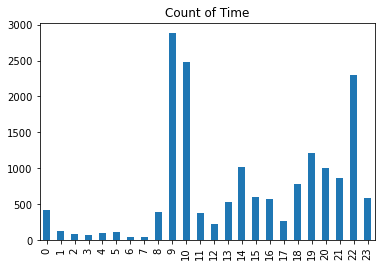

In [12]:
# 计算违章时间段统计
import matplotlib.pyplot as plt

df_date = df
df['违法时间'] = pd.to_datetime(df['违法时间'])

df_date['违法时间'] = pd.to_datetime(df['违法时间'])
df_date = df_date.sort_values('违法时间')
df_date = df_date.set_index('违法时间')
# print(df_date.truncate(before='2019',after='2022-1').head())

df_date_col = df['违法时间']
df_date_col['hour'] = df['违法时间'].dt.hour
df_date_col['minute'] = df['违法时间'].dt.minute

a = df_date_col['hour'].value_counts().sort_index()
a.plot(kind='bar', x='Time')
plt.title("Count of Time")
plt.show()

# print(df_date_col['hour'])
# print(df_date_col['minute'])
# df_date=df_date['2016-02-2':'2016-02-10']
# 统计每个时间段内的个数
# df['违法时间'].dt.year = 2021
# df['违法时间'].dt.month = 1
# df['违法时间'].dt.day = 1
# df1=df_date_col['2021-01-01 00':'2016-02-10']
# print(df_date_col)




## 群体画像
    

先根据驾驶证号提取出每个违章者
- 在6个月内违章者的违章次数（其实就是频度）
- 距离今天的最近违章时间
- 违章的严重程度

分别进行等级划分

In [13]:
#1.得到驾照号码的主键
#2.根据号码 统计其违章次数、违章时间、严重程度以及三个指标的评级

# 得到每个司机最近一次的违章时间
df_recent = df.groupby('驾驶证号').agg({'违法时间': 'max'})
# df_recent= df.groupby('驾驶证号')['违法时间'].transform('max')
print(df_recent)

# 统计违章分数
df_s = df.groupby('驾驶证号').agg({'违法记分数': 'sum'})
print(df_s)

                                  违法时间
驾驶证号                                  
110106198512180312 2021-05-27 09:37:00
110111197812194050 2021-04-13 14:54:00
110111198103016117 2021-05-12 20:53:00
110222197805183817 2021-06-10 09:20:00
12010219770822127X 2021-04-06 09:25:00
...                                ...
654122198808303317 2021-05-25 13:53:00
65412819701124101X 2021-05-05 22:20:00
654221199309231818 2021-05-28 09:42:00
654324197512010071 2021-06-05 10:43:00
659001197010163215 2021-06-04 13:04:00

[15051 rows x 1 columns]
                    违法记分数
驾驶证号                     
110106198512180312      0
110111197812194050      0
110111198103016117      0
110222197805183817      0
12010219770822127X      0
...                   ...
654122198808303317      1
65412819701124101X      0
654221199309231818      6
654324197512010071      1
659001197010163215      3

[15051 rows x 1 columns]


In [14]:
from datetime import datetime

#driver_count.rename(index={'驾驶证号':'违法次数'},inplace=True)
#df_recent.rename(index = {'违法时间':'最近违法时间'},inplace=True)
df_driver = pd.concat([driver_count, df_recent, df_s], axis=1)
df_driver.rename(columns={'驾驶证号': '违法次数', '违法时间': '最近违法时间'}, inplace=True)
df_driver['frequent_level'] = 0
df_driver['recent_level'] = 0

# df_driver.loc[df_driver['违法次数'] >= 4, 'frequent_level'] = 2
# df_driver.loc[(df_driver['违法次数'] < 4) & (df_driver['违法次数'] >= 2), 'frequent_level'] = 1
# df_driver.loc[df_driver['违法次数'] == 1, 'frequent_level'] = 0

df_driver.loc[df_driver['违法次数'] >= 6, 'frequent_level'] = 5
df_driver.loc[(df_driver['违法次数'] < 4) & (df_driver['违法次数'] >= 2), 'frequent_level'] = 4
df_driver.loc[(df_driver['违法次数'] < 4) & (df_driver['违法次数'] >= 2), 'frequent_level'] = 3
df_driver.loc[(df_driver['违法次数'] < 4) & (df_driver['违法次数'] >= 2), 'frequent_level'] = 2
df_driver.loc[df_driver['违法次数'] == 1, 'frequent_level'] = 1

#最近一个月、最近三个月、最近六个月有违章记录
df_driver.loc[df_driver['最近违法时间'] >= '2021-05-30', 'recent_level'] = 2
df_driver.loc[(df_driver['最近违法时间'] < '2021-05-30') & (df_driver['最近违法时间'] > '2021-03-30'), 'recent_level'] = 1
df_driver.loc[df_driver['最近违法时间'] < '2021-03-30', 'recent_level'] = 0

df_driver['最近违法时间'] = pd.to_datetime(df_driver['最近违法时间'])
## 原本是TimedeltaProperties，转成int
df_driver['recent'] = datetime(2021, 7, 1, 0, 0) - df_driver['最近违法时间']
df_driver['recent'] = df_driver['recent'].dt.days

df_driver.loc[df_driver['违法记分数'] == 0, 'mount_level'] = 0
df_driver.loc[(df_driver['违法记分数'] < 6) & (df_driver['违法记分数'] >= 1), 'mount_level'] = 1
df_driver.loc[df_driver['违法记分数'] >= 6, 'mount_level'] = 2

df_driver

,违法次数,最近违法时间,违法记分数,frequent_level,recent_level,recent,mount_level
332526198009190310,7,2021-05-24 14:35:00,7,5,1,37,2.0
430402197211083034,6,2021-06-09 09:14:00,3,5,2,21,1.0
232722197605111719,6,2021-06-21 10:15:00,1,5,2,9,1.0
412325198305201216,6,2021-05-15 10:38:00,0,5,1,46,0.0
522529197111135414,6,2021-06-17 09:10:00,3,5,2,13,1.0
...,...,...,...,...,...,...,...
231102198612291717,1,2021-01-04 22:32:00,0,1,0,177,0.0
320922197310165411,1,2021-05-27 22:23:00,0,1,1,34,0.0
321023198111072231,1,2021-02-01 23:52:00,1,1,0,149,1.0
341227199702050434,1,2021-05-13 09:14:00,0,1,1,48,0.0


对几个变量进行等级划分
进行相关度检验
进行聚类


<ipython-input-15-e4f3fc9b707f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['label'] = k_means.labels_


0    4871
3    3863
2    3462
1    2855
Name: label, dtype: int64


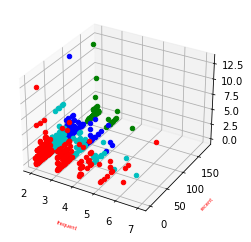

In [15]:
# k-mean聚类
# 用原始值聚类
from sklearn.cluster import KMeans

X = df_driver[['违法次数', 'recent', '违法记分数']].values

k_means = KMeans(n_clusters=4, random_state=0).fit(X)

df_result = df_driver[['frequent_level', 'recent_level', 'mount_level']]
df_result['label'] = k_means.labels_
print(df_result['label'].value_counts())

label_pred = k_means.labels_
centroids = k_means.cluster_centers_
inertia = k_means.inertia_
length, dim = X.shape
color = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
ax = plt.subplot(111, projection='3d')
for i in range(0, 1000):
    ax.scatter(X[i, 0], X[i, 1], X[i, 2], c=color[label_pred[i]])
plt.xlabel('frequent',fontsize=5,color='r')
plt.ylabel('recent',fontsize=5,color='r')
plt.show()

<ipython-input-16-cd31aab7ed9c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['label'] = k_means.labels_


2    4868
0    3897
3    3431
1    2855
Name: label, dtype: int64


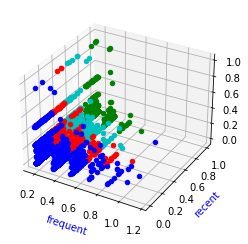

In [16]:
# k-mean聚类
# 数据标准化后的聚类计算
from sklearn.cluster import KMeans

#数据标准化

df_driver['frequent_nor'] = df_driver['违法次数'] / (df_driver['违法次数'].max() - df_driver['违法次数'].min())
df_driver['recent_nor'] = df_driver['recent'] / (df_driver['recent'].max() - df_driver['recent'].min())
df_driver['mount_nor'] = df_driver['违法记分数'] / (df_driver['违法记分数'].max() - df_driver['违法记分数'].min())

X = df_driver[['frequent_nor', 'recent_nor', 'mount_nor']].values

k_means = KMeans(n_clusters=4, random_state=0).fit(X)

df_result = df_driver[['frequent_nor', 'recent_nor', 'mount_nor']]
df_result['label'] = k_means.labels_
print(df_result['label'].value_counts())

label_pred = k_means.labels_
centroids = k_means.cluster_centers_
inertia = k_means.inertia_
length, dim = X.shape
color = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
ax1 = plt.subplot(111, projection='3d')

for i in range(0, length):
    ax1.scatter(X[i, 0], X[i, 1], X[i, 2], c=color[label_pred[i]])
plt.xlabel('frequent',fontsize=10,color='b')
plt.ylabel('recent',fontsize=10,color='b')

plt.show()

In [17]:
res = df_result.groupby('label').agg({'max', 'min', 'mean'})
res

frequent_nor                     recent_nor                      \
               min       max      mean        min       max      mean   
label                                                                   
0         0.166667  0.833333  0.193097   0.233333  0.461111  0.344248   
1         0.166667  0.666667  0.176124   0.744444  1.000000  0.912783   
2         0.166667  1.166667  0.201144   0.000000  0.255556  0.125576   
3         0.166667  0.666667  0.179539   0.450000  0.733333  0.556767   

      mount_nor                      
            min       max      mean  
label                                
0           0.0  0.923077  0.022601  
1           0.0  0.923077  0.015681  
2           0.0  1.000000  0.034653  
3           0.0  1.000000  0.021927

In [18]:
df_driver.to_csv("/Users/jiarui/Study/交通事故/data/output1.csv")